ODE Project

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from pyswarm import pso

df = pd.read_excel ('C:/Users/Charvin Fernanlim/Desktop/Algo 3/revenue1.xlsx',header = 1)
df1 = pd.DataFrame(df,columns=['Year','Adidas','Nike'])

In [0]:
print(df1)
df2=pd.DataFrame(df,columns=['Adidas','Nike'])


     Year  Adidas    Nike
NaN  2005   7.499  13.740
NaN  2006  11.395  14.955
NaN  2007  11.638  16.326
NaN  2008  12.203  18.627
NaN  2009  11.731  19.176
NaN  2010  13.549  19.014
NaN  2011  15.054  20.117
NaN  2012  16.818  23.331
NaN  2013  16.049  25.313
NaN  2014  16.423  27.799
NaN  2015  19.114  30.601
NaN  2016  20.886  32.376
NaN  2017  23.976  34.350
NaN  2018  24.764  36.397


In [0]:
print(df1)
df2=pd.DataFrame(df,columns=['Adidas','Nike'])
df5=pd.DataFrame(df,columns=['Year','Adidas','Nike'])
df5['Adidas_exp'] = Adidas
df5['Nike_exp'] = Nike
print(df5)

     Year  Adidas    Nike
NaN  2005   7.499  13.740
NaN  2006  11.395  14.955
NaN  2007  11.638  16.326
NaN  2008  12.203  18.627
NaN  2009  11.731  19.176
NaN  2010  13.549  19.014
NaN  2011  15.054  20.117
NaN  2012  16.818  23.331
NaN  2013  16.049  25.313
NaN  2014  16.423  27.799
NaN  2015  19.114  30.601
NaN  2016  20.886  32.376
NaN  2017  23.976  34.350
NaN  2018  24.764  36.397


NameError: name 'Adidas' is not defined

In [0]:
arrayd=df2.as_matrix()
arrayd=np.transpose(arrayd)
print(arrayd)

[[ 7.499 11.395 11.638 12.203 11.731 13.549 15.054 16.818 16.049 16.423
  19.114 20.886 23.976 24.764]
 [13.74  14.955 16.326 18.627 19.176 19.014 20.117 23.331 25.313 27.799
  30.601 32.376 34.35  36.397]]


# LOTKA VOLTERRA

PSO

In [0]:
def A(x1,x2,a12,K1,r1):
    return (r1*x1*(1-(x1+a12*x2)/K1))
def N(x1,x2,a21,K2,r2):
    return (r2*x2*(1-(x2+a21*x1)/K2))*(x1/x2)

def test(B):
    def model(v,t):
        r1,r2,K1,K2,a12,a21 = B
        x1 = v[0] #adidas
        x2 = v[1] #nike

        dAdt = A(x1,x2,a12,K1,r1)
        dNdt = N(x1,x2,a21,K2,r2)

        return [dAdt,dNdt]
    return model

def solver(B,v0,t):
    f = test(B)
    n = odeint(f,v0,t)
    N = []
    A = []
    U = []
    for i in range(len(n)):
        N.append(n[i,1])
        A.append(n[i,0])

    return A,N

v0 = [7.499,13.740] 
t = np.arange(2005,2019)

def f_(X):
    return np.sum((solver(X,v0,t)-arrayd)**2)

lb = [0,0,0,0,0,0] # lower bounds for params
ub = [1,1,500,300,100,100] # upper bounds for params

xopt, fopt = pso(f_, lb, ub, maxiter = 500) 

print("Minimum parameters = ", xopt)
print("error = ", fopt)

C:\Users\Charvin Fernanlim\AppData\Roaming\Python\Python36\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
D:\NTU\Spyder\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Charvin Fernanlim\AppData\Roaming\Python\Python36\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
D:\NTU\Spyder\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
D:\NTU\Spyder\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\_

Stopping search: Swarm best objective change less than 1e-08
Minimum parameters =  [1.55907865e-01 1.45175238e-01 4.39835463e+02 2.99978110e+02
 7.23238680e+00 2.04647665e+00]
error =  34.952959995785264


In [0]:
B=xopt
[r1,r2,K1,K2,a12,a21] = B

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
([7.499, 8.426038543140743, 9.43793740126319, 10.534685349908814, 11.714063491026577, 12.971222005787883, 14.298305074408894, 15.684163670962144, 17.114205931682076, 18.570428221613483, 20.03166444877676, 21.47407247196646, 22.871855423330864, 24.198188313117317], [13.74, 14.77728738489599, 15.927670780048635, 17.19769153155341, 18.592875371462256, 20.11739680493184, 21.77374788831289, 23.56243384730573, 25.48172562640444, 27.527496894977702, 29.693170697940413, 31.96979181183698, 34.34622962821742, 36.80950143483386])


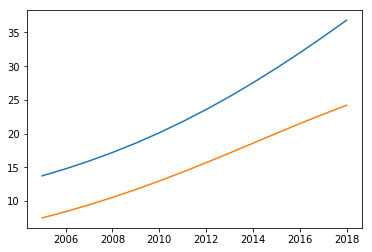

In [0]:
t=np.arange(2005,2019)
Nike = (solver(B,v0,t)[1])
Adidas = solver(B,v0,t)[0]
plt.plot(t,Nike)
plt.plot(t,Adidas)

print(t)
print(solver(B,v0,t))
plt.show()

     Year  Adidas    Nike
NaN  2005   7.499  13.740
NaN  2006  11.395  14.955
NaN  2007  11.638  16.326
NaN  2008  12.203  18.627
NaN  2009  11.731  19.176
NaN  2010  13.549  19.014
NaN  2011  15.054  20.117
NaN  2012  16.818  23.331
NaN  2013  16.049  25.313
NaN  2014  16.423  27.799
NaN  2015  19.114  30.601
NaN  2016  20.886  32.376
NaN  2017  23.976  34.350
NaN  2018  24.764  36.397


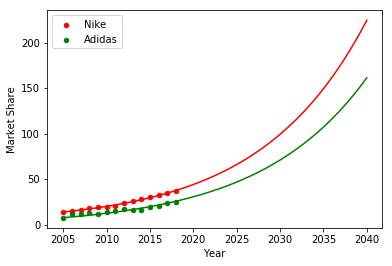

In [0]:
df4=pd.DataFrame(df,columns=['Year','Adidas','Nike'])
print(df4)

t1 = np.linspace(2005,2040,1000)
Nike = (solver(B,v0,t1)[1])
Adidas = solver(B,v0,t1)[0]

ax = df4.plot.scatter(x='Year', y='Nike',color = "red",label = "Nike")
ax = df4.plot.scatter(x='Year', y='Adidas', color='Green', label='Adidas', ax=ax)
ax.set_ylabel('Market Share')
plt.plot(t1,Nike,color = "red")
plt.plot(t1,Adidas,color = "green")
plt.show()


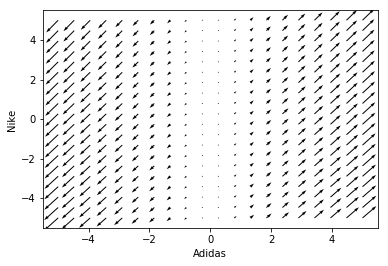

In [0]:
t=np.arange(2005,2019)
t2 = np.linspace(2005,2019,1000)

fig1, ax1 = plt.subplots()
Nike1 = solver(B,v0,t)[1]
Adidas1 = solver(B,v0,t)[0]
Nike2=solver(B,v0,t2)[1]
Adidas2 = solver(B,v0,t2)[0]

    
Y1,Y2 = np.meshgrid(np.linspace(-5,5,20),(np.linspace(-5,5,20)))    

ax1.quiver(Y1, Y2,A(Y1,Y2,a12,K1,r1),N(Y1,Y2,a21,K2,r2)) 

ax1.set_xlabel('Adidas')
ax1.set_ylabel('Nike')  
plt.show()

# CUSTOM 

In [0]:
def A(x1,x2,b1,r1):
    return (r1*x1*x2+b1*x1)/(x1+x2)
def N(x1,x2,b2,r2):
    return (r2*x2*x1+b2*x2)/(x1+x2)

def test(B):
    def model(v,t):
        r1,r2,b1,b2 = B
        x1 = v[0] #adidas
        x2 = v[1] #nike

        dAdt = A(x1,x2,b1,r1)
        dNdt = N(x1,x2,b2,r2)

        return [dAdt,dNdt]
    return model

def solver(B,v0,t):
    f = test(B)
    n = odeint(f,v0,t)
    return n[:, 0], n[:, 1]

v0 = [7.499,13.740] 
t = np.arange(2005,2019)

def f_(X):
    return np.sum((solver(X,v0,t)-arrayd)**2)

lb = [-1,-1,-1,-1] # lower bounds for params
ub = [1,1,1,1] # upper bounds for params

xopt, fopt = pso(f_, lb, ub, maxiter = 500) 

print("Minimum parameters = ", xopt)
print("error = ", fopt)
#predator/total * proportion <- our idea for this model


C:\Users\Charvin Fernanlim\AppData\Roaming\Python\Python36\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Stopping search: Swarm best position change less than 1e-08
Minimum parameters =  [ 0.17802315  0.19207785 -0.48216298  0.12352205]
error =  46.03674256977452


In [0]:
#Minimum parameters =  [0.11624032 0.18906644 0.7835683  0.12724472]
#error =  36.54570408122412

#Minimum parameters =  [ 0.15778102  0.21897772 -0.06277946 -0.22972655]
#error =  44.15198663762149
# B=[ 0.15778102 , 0.21897772, -0.06277946, -0.22972655]

xopt=[ 0.15778102 , 0.21897772, -0.06277946, -0.22972655]
[r1,r2,b1,b2] = xopt
print(r1, r2, b1, b2)

0.15778102 0.21897772 -0.06277946 -0.22972655


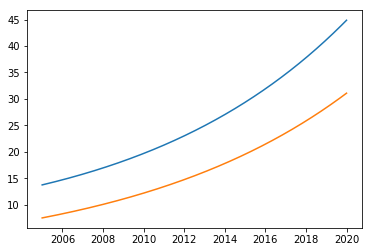

In [0]:
t1 = np.linspace(2005,2020,1000)
Adidas, Nike = solver(xopt,v0,t1)
plt.plot(t1,Nike)
plt.plot(t1,Adidas)
plt.show()

     Year  Adidas    Nike
NaN  2005   7.499  13.740
NaN  2006  11.395  14.955
NaN  2007  11.638  16.326
NaN  2008  12.203  18.627
NaN  2009  11.731  19.176
NaN  2010  13.549  19.014
NaN  2011  15.054  20.117
NaN  2012  16.818  23.331
NaN  2013  16.049  25.313
NaN  2014  16.423  27.799
NaN  2015  19.114  30.601
NaN  2016  20.886  32.376
NaN  2017  23.976  34.350
NaN  2018  24.764  36.397


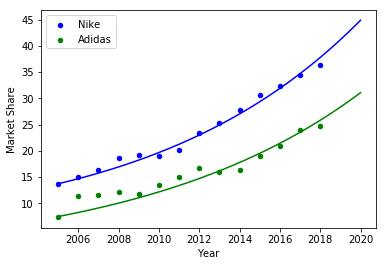

In [0]:
df4=pd.DataFrame(df,columns=['Year','Adidas','Nike'])
print(df4)


ax = df4.plot.scatter(x='Year', y='Nike',color = "blue",label = "Nike")
ax = df4.plot.scatter(x='Year', y='Adidas', color='Green', label='Adidas', ax=ax)
ax.set_ylabel('Market Share')
plt.plot(t1,Nike,color = "blue")
plt.plot(t1,Adidas,color = "green")
plt.show()


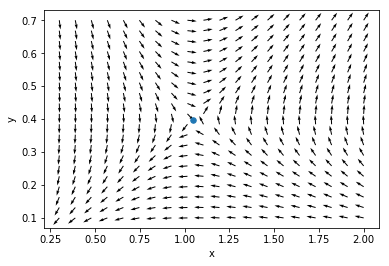

In [0]:
fig1, ax1 = plt.subplots()


X1,X2 = np.meshgrid(np.linspace(0.3,2,20),(np.linspace(0.1,0.7,20)))    

U = A(X1,X2,b1,r1) / np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2);
V = N(X1,X2,b2,r2) / np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2)    
ax1.quiver(X1, X2,U,V) 
plt.scatter(1.04909,0.39789,s=30) #critical point (Saddle)
ax1.set_xlabel('x')
ax1.set_ylabel('y')  
plt.show()

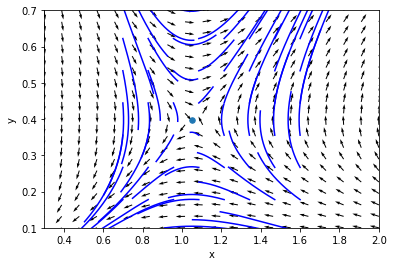

In [0]:
fig1, ax1 = plt.subplots()


X1,X2 = np.meshgrid(np.linspace(0.3,2,20),(np.linspace(0.1,0.7,20)))    

U = A(X1,X2,b1,r1) / np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2);
V = N(X1,X2,b2,r2) / np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2)    
ax1.quiver(X1, X2,U,V) 

for y in np.linspace(0,0.8,10):
    for x in np.linspace(0.7,1.6,8):
        t2=np.linspace(0,10,1000)
        y2=[x,y]
        ad,nk=solver(xopt,y2,t2)
        plt.plot(ad,nk,'b-')
    
plt.scatter(1.04909,0.39789,s=30) #critical point (Saddle)
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.set_xlim([0.3,2])
ax1.set_ylim([0.1,0.7])
plt.show()

Refering to past year's project where they assumed 3 telecoms companies are being preyed, we realize that companies are actually trying to gain revenue as much as possible. Thus, we place companies as predators that wanted to maximize their revenue. However due to the limitation of population, predator can not consume customers more than existing ones. Therefore we divide by the total revenue of sports industry (since by LV model we assume that there are only 2 sports companies, namely Adidas and Nike). So, being part of the sports attire population, we multiply it by its proportion in the sports industry. The final ODE is:

(predator function)/(total revenue in industry) * (proportion of the company in the industry)

Critical point: (0.939766,1.002381)
eigenvalues : ()
[0.42727315 0.35407735 0.42828811 0.33274995]

In [0]:
x= 1.04909
y= 0.39789

k = (0.15778102*y-0.06277946)/(x+y) - (0.15778102*y*x-0.06277946*x)/(x+y)**2

In [0]:
l = (0.15778102*x)/(x+y) - (0.15778102*y*x-0.06277946*x)/(x+y)**2

In [0]:
m = (0.218978*y)/(x+y) - (0.218978*y*x-0.229727*y)/(x+y)**2

In [0]:
n = (0.218978*x-0.229727)/(x+y) - (0.218978*y*x-0.229727*y)/(x+y)**2

In [0]:
mat = np.matrix([[k,l],[m,n]])
np.linalg.eig(mat)

(array([-0.08299495,  0.08299527]), matrix([[-0.80941205, -0.80941101],
         [ 0.58724112, -0.58724255]]))

eigenvalues : [-0.08299495,  0.08299527]
eigenvector : [[-0.80941205, -0.80941101], 
         [ 0.58724112, -0.58724255]]

In [0]:
print(r1, r2, b1, b2)

0.15778102 0.21897772 -0.06277946 -0.22972655


D:\NTU\Spyder\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
D:\NTU\Spyder\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


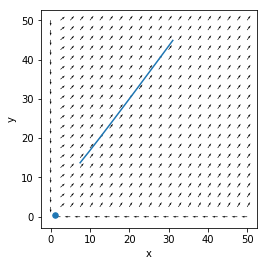

In [0]:
fig1, ax1 = plt.subplots()

X1,X2 = np.meshgrid(np.linspace(0,50,21),(np.linspace(0,50,21)))    

U = A(X1,X2,b1,r1); #/ np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2);
V = N(X1,X2,b2,r2); #/ np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2)
R = np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2);
U = U/R;
V = V/R;
ax1.quiver(X1, X2,U,V) 
# plt.scatter(1.04909,0.39789,s=30) #critical point (Saddle)
ax1.set_xlabel('x')
ax1.set_ylabel('y')  
plt.plot(Adidas, Nike)
plt.scatter(1.04909,0.39789,s=30)
ax1.set_aspect(aspect = "equal")
plt.show()

In [0]:
fig1, ax1 = plt.subplots()

X1,X2 = np.meshgrid(np.linspace(0,50,21),(np.linspace(0,50,21)))    

U = A(X1,X2,b1,r1); #/ np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2);
V = N(X1,X2,b2,r2); #/ np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2)
R = np.sqrt(A(X1,X2,b1,r1)**2 + N(X1,X2,b2,r2)**2);
U = U/R;
V = V/R;
ax1.quiver(X1, X2,U,V) 
# plt.scatter(1.04909,0.39789,s=30) #critical point (Saddle)
ax1.set_xlabel('x')
ax1.set_ylabel('y')  

plt.scatter(1.04909,0.39789,s=30)
ax1.set_aspect(aspect = "equal")
plt.show()

In [0]:
d0 = 10**-2
t1 = np.linspace(2005, 2018,1000)
#spectrum for x-axis
#v0 = [7.499,13.740]
la = np.array([1,1])*(d0/np.sqrt(2))
v1 = np.array([0,0])+la
dist = []
lambdax = []
for i in range(1000):
    dist.append(np.sqrt((solver(xopt,v1,t1)[0][i] - Adidas[i])*2+(solver(xopt,v1,t1)[1][i]-Nike[i])*2))
    n = (d0/dist[i])*np.array([(solver(xopt,v1,t1)[0][i] - Adidas[i]),(solver(xopt,v1,t1)[1][i]-Nike[i])])
    v1 = np.array([Adidas[i],Nike[i]])+n
for i in range(len(dist)):    
    lambdax.append(np.log(dist[i]/d0))
res = []
res = np.cumsum(lambdax)/np.arange(1, 1001)
plt.plot(res)
print(lambdax)

C:\Users\Charvin Fernanlim\AppData\Roaming\Python\Python36\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
D:\NTU\Spyder\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,